 # Exploratory Data Analysis - AMCAT
 
 **Data Description**
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

* ID: Candidate ID
* Salary: Salary of the candidate
* DOJ: Date of joining the job
* DOL: Date of leaving the job
* Designation: Job designation/title
* JobCity: City where the job is located
* Gender: Gender of the candidate
* DOB: Date of birth of the candidate
* 10percentage: Percentage score in 10th grade
* 12percentage: Percentage score in 12th grade
* CollegeID: College ID of the candidate
* CollegeTier: Tier of the college
* Degree: Degree pursued by the candidate
* Specialization: Specialization pursued by the candidate
* CollegeGPA: Grade Point Average in college
* CollegeCityID: ID of the college city
* CollegeCityTier: Tier of the college city
* CollegeState: State where the college is located
* GraduationYear: Year of graduation
* Domain: Domain knowledge score
* ComputerProgramming: Score in computer programming
* ElectronicsAndSemicon: Score in electronics and semiconductors
* ComputerScience: Score in computer science
* MechanicalEngg: Score in mechanical engineering
* ElectricalEngg: Score in electrical engineering
* TelecomEngg: Score in telecommunications engineering
* CivilEngg: Score in civil engineering
* Conscientiousness, Agreeableness, Extraversion, Neuroticism, Openness_to_experience: Personality trait scores
 
**The Objective:**
Explore the dataset to identify the key factors that Significantly affect the salary levels among the job seekers. That Includes factors such as education, skills, location, experience.

**Key Objectives:**
1. Identifying the trends or patterns  in salary distributions across different job designations and cities.
2. correlation among the key factors such as education, gender, designation, skills, experience and personal characteristics which effects salary.
3. Make some claims and try to prove through Statistical methods.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import statsmodels.api as sm
%matplotlib inline

In [ ]:
df1=pd.read_csv(r"C:\Users\dines\Desktop\Notes\aiml-datascience-notes-python\data\Amcat-data.csv")
df1.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [50]:
print(f"No. of Records:{df1.shape[0]}")
print(f"No. of feature:{df1.shape[1]}")
print('*'*20)
df1.info()

No. of Records:3998
No. of feature:39
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 1

In [51]:
df1.shape

(3998, 39)

In [52]:
#dropping unncessary columns
df1 = df1.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])

In [53]:
df1.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [54]:
for i in df1.columns:
    print('='*30,i,'='*30)
    print(df1[i].unique())

============================== Salary ==============================
[ 420000.  500000.  325000. 1100000.  200000.  300000.  400000.  600000.
  230000.  450000.  270000.  350000.  250000.  120000.  320000.  190000.
  180000.  335000.  435000.  345000.  145000.  220000.  530000.  340000.
  360000.  215000.   80000.  330000.  380000.  110000.  205000.   95000.
  390000.   60000.  240000.  525000.  305000.  150000.  310000.  455000.
  800000.  100000.  280000.  445000.  315000.  370000.  275000. 1500000.
  425000.  470000.  460000.  510000.  480000.  170000.  640000.  225000.
  440000. 1200000.  675000.  105000.  195000.  385000.  235000.  615000.
  290000.  140000.  405000. 1860000.  375000.  430000.  660000.   70000.
  410000.  550000.   35000.  115000.  415000.  265000.  285000.  245000.
  395000.  560000.  700000.  185000.  160000.  625000.   85000.  135000.
  785000.  210000.  155000.  355000.  535000.  690000.  260000. 1110000.
 1000000.  505000.  475000.  715000.  820000.   90000. 

### Observations of the columns(regarding cleaning and missing values):
1. We can see the DOJ,DOL,DOB are given in timestamp format
2. Job city column contains -1 values which are NaN equivalents.
3. 10 board column contain 0 value which is missing value
4. 12 board column contain 0 value which is missing value
5. college state column contain 'union teritory' which is not a specific state
6. Graduation year column contain 0 which is a missing value
7. Domain column contain -1 which is a missing values

In [55]:
df1["DOL"]=df1["DOL"].replace("present",dt.datetime.today())
df1['DOL'] = pd.to_datetime(df1['DOL'])
df1['DOJ'] = pd.to_datetime(df1['DOJ'])
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2024-02-23 02:30:36.133894,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2024-02-23 02:30:36.133894,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2024-02-23 02:30:36.133894,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2024-02-23 02:30:36.133894,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01 00:00:00.000000,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [56]:
# changing the gender column with proper phrase
df1['Gender'].replace({'f':'Female','m':'Male'}, inplace = True)
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2024-02-23 02:30:36.133894,senior quality engineer,Bangalore,Female,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2024-02-23 02:30:36.133894,assistant manager,Indore,Male,10/4/89 0:00,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2024-02-23 02:30:36.133894,systems engineer,Chennai,Female,8/3/92 0:00,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2024-02-23 02:30:36.133894,senior software engineer,Gurgaon,Male,12/5/89 0:00,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01 00:00:00.000000,get,Manesar,Male,2/27/91 0:00,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [57]:
print((df1['10percentage'] <=10).sum())
print((df1['12percentage'] <=10).sum())
print((df1['collegeGPA'] <=10).sum())

0
0
12


In [58]:
# collegeGPA columns has some has -1 and 0 values, imputing values
df1.loc[df1['collegeGPA']<=10,'collegeGPA'] = (df1.loc[df1['collegeGPA']<=10,'collegeGPA']/10)*100
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2024-02-23 02:30:36.133894,senior quality engineer,Bangalore,Female,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2024-02-23 02:30:36.133894,assistant manager,Indore,Male,10/4/89 0:00,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2024-02-23 02:30:36.133894,systems engineer,Chennai,Female,8/3/92 0:00,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2024-02-23 02:30:36.133894,senior software engineer,Gurgaon,Male,12/5/89 0:00,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01 00:00:00.000000,get,Manesar,Male,2/27/91 0:00,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [59]:
print((df1==0).sum()[(df1==0).sum() > 0])

CollegeCityTier    2797
GraduationYear        1
dtype: int64


In [60]:
(df1==-1).sum()[(df1==-1).sum()>0]/len(df1)*100

Domain                    6.153077
ComputerProgramming      21.710855
ElectronicsAndSemicon    71.385693
ComputerScience          77.438719
MechanicalEngg           94.122061
ElectricalEngg           95.972986
TelecomEngg              90.645323
CivilEngg                98.949475
dtype: float64

The following columns describes subjects which are optional for the exam and that is why they
have large number of -1(null values). Hence we will be dropping the columns out of analysis in
which the percentage for -1 values is greater than or equal to 80% and for the rest of them, we will
impute the values as zero.

In [61]:
cols=['10board','12board','CollegeTier','MechanicalEngg', 'ElectricalEngg', 'TelecomEngg','CivilEngg','ComputerScience']
df1 = df1.drop(columns =cols)

**Keeping top 30 Desingations and rest are others**

In [62]:
for Designation in df1['Designation'].unique():
    min_count = df1['Designation'].value_counts()[:30].min()
    if df1[df1['Designation'] == Designation]["Designation"].value_counts()[0] < min_count:
        df1.loc[df1['Designation'] == Designation, 'Designation'] = 'other'

In [63]:
mech_des=df1[df1["Specialization"].isin(["mechanical engineering","mechanical and automation"])]["Designation"].mode()[0]
df1["Designation"].replace("get",mech_des,inplace=True)

eee_des=df1[df1["Specialization"]=="electronics and electrical engineering"]["Designation"].mode()[0]
df1["Designation"].replace("get",eee_des,inplace=True)

In [64]:
df1["JobCity"]=df1["JobCity"].str.strip()
df1["JobCity"]=df1["JobCity"].str.title()
# replace the city names with proper proper names
df1["JobCity"]=df1["JobCity"].str.replace('Navi Mumbai','Mumbai').replace('Chennai & Mumbai','Mumbai')

df1["JobCity"]=df1["JobCity"].str.replace('Greater Noida','Noida').replace('Nouda',"Noida").replace('A-64,Sec-64,Noida',"Noida")

df1["JobCity"]=df1["JobCity"].str.replace('Bhubaneswar','Bhubaneshwar').replace('Bhubneshwar','Bhubaneshwar')

df1["JobCity"]=df1["JobCity"].str.replace('Trivandrum','Thiruvananthapuram').replace('Technopark, Trivandrum','Thiruvananthapuram')

df1["JobCity"]=df1["JobCity"].str.replace('Vsakhapttnam','Visakhapatnam').replace('Vizag','Visakhapatnam')

df1["JobCity"]=df1["JobCity"].str.replace('New Delhi - Jaisalmer','New Delhi').replace('Delhi','New Delhi').replace('Delhi/Ncr','New Delhi').replace('New Dehli','New Delhi')

df1["JobCity"]=df1["JobCity"].str.replace('Kochi/Cochin','Kochi').replace('Kochi/Cochin, Chennai And Coimbatore','Kochi')

df1["JobCity"]=df1["JobCity"].str.replace('Gurgoan','Gurgaon').replace('Guragaon','Gurgaon')

df1["JobCity"]=df1["JobCity"].str.replace('Calicut','Kolkata')

df1["JobCity"]=df1["JobCity"].str.replace('Gandhinagar','Gandhi Nagar')


df1["JobCity"]=df1["JobCity"].str.replace('Indirapuram, Ghaziabad',"Ghaziabad").replace('Gaziabaad',"Ghaziabad").replace('Gajiabaad',"Ghaziabad")


df1["JobCity"]=df1["JobCity"].str.replace('Kudankulam ,Tarapur',"Tarapur")

df1["JobCity"]=df1["JobCity"].str.replace('Sadulpur,Rajgarh,Distt-Churu,Rajasthan','Sadulpur')
df1["JobCity"]=df1["JobCity"].str.replace('Kalmar, Sweden','Sweden')
df1["JobCity"]=df1["JobCity"].str.replace('Al Jubail,Saudi Arabia','Al Jubail').replace('Jeddah Saudi Arabia','Al Jubail')
df1["JobCity"]=df1["JobCity"].str.replace('Hyderabad(Bhadurpally)','Hyderabad').replace('Secunderabad','Hyderabad').replace('Navi Mumbai , Hyderabad','Hyderabad').replace('Hderabad','Hyderabad')

df1["JobCity"]=df1["JobCity"].str.replace('Bangalore','Bengaluru').replace('Asifabadbanglore','Bengaluru').replace('Banglore','Bengaluru').replace('Banagalore','Bengaluru').replace('Chennai, Bangalore','Bengaluru').replace('Banaglore','Bengaluru')
df1["JobCity"]=df1["JobCity"].str.replace('Tirupathi','Tirupati')
    
df1["JobCity"]=df1["JobCity"].str.replace('Mettur, Tamil Nadu','Mettur')
    
df1["JobCity"]=df1["JobCity"].str.replace('Pondy','Pondicherry')
   
df1["JobCity"]=df1["JobCity"].str.replace('Rayagada, Odisha','Rayagada')

In [65]:
df1[df1["JobCity"]=="-1"][["Designation","Salary","Gender","JobCity", "Degree","CollegeState","Specialization"]].mode()

,Designation,Salary,Gender,JobCity,Degree,CollegeState,Specialization
0,other,200000.0,Male,-1,B.Tech/B.E.,Uttar Pradesh,electronics and communication engineering


In [66]:
mode=[]

mode.append(df1[df1["Designation"]=="other"]["JobCity"].mode().to_list()[0])

mode.append(df1[df1["Salary"]==200000]["JobCity"].mode().to_list()[0])

mode.append(df1[df1["Degree"]=="B.Tech/B.E."]["JobCity"].mode().to_list()[0])

mode.append(df1[df1["Specialization"]=="electronics and communication engineering"]["JobCity"].mode().to_list()[0])

mode.append(df1[df1["CollegeState"]=="Uttar Pradesh"]["JobCity"].mode().to_list()[0])

mode

['Bengaluru', '-1', 'Bengaluru', 'Bengaluru', 'Noida']

In [67]:
#imputing "-1", with Bengaluru
df1["JobCity"]=df1["JobCity"].replace("-1","Bengaluru")

In [68]:
specialization_map={'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}
df1["Specialization"]=df1["Specialization"].map(specialization_map)
df1.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,12graduation,12percentage,...,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,2024-02-23 02:30:36.133894,other,Bengaluru,Female,2/19/90 0:00,84.3,2007,95.8,...,585,525,0.635979,445,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,2024-02-23 02:30:36.133894,assistant manager,Indore,Male,10/4/89 0:00,85.4,2007,85.0,...,610,780,0.960603,-1,466,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,2024-02-23 02:30:36.133894,systems engineer,Chennai,Female,8/3/92 0:00,85.0,2010,68.2,...,545,370,0.450877,395,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,2024-02-23 02:30:36.133894,senior software engineer,Gurgaon,Male,12/5/89 0:00,85.6,2007,83.6,...,585,625,0.974396,615,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,2015-03-01 00:00:00.000000,other,Manesar,Male,2/27/91 0:00,78.0,2008,76.8,...,625,465,0.124502,-1,233,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Feature Engineering

In [69]:
#extracting year from timestamp to calculate the age of candidate at the time graduation and 12 gradution
df1["DOB"]=pd.to_datetime(df1["DOB"])
df1["DOB"]=df1["DOB"].dt.year

#engineering the column when time graduation age
df1["GraduationYear"]=df1["GraduationYear"].replace(0,df1.GraduationYear.mode()[0])
df1["grad_age"]=df1["GraduationYear"]-df1["DOB"]

#adding tenure columns by using date of leaving and date of joining 
df1["tenure"]=pd.to_datetime(df1["DOL"]).dt.year-pd.to_datetime(df1["DOJ"]).dt.year

## Uni-Variate Analysis

In [70]:
# function for cdf
def cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x, y

In [71]:
def univariate_num(col):
    
    print(f"The Average of {col}:",df1[col].median())
    print(f"The Maximum of {col}:",df1[col].max())
    print(f"The Minimum of {col}:",df1[col].min())
    
    print('='*30,col,'='*30 )
    plt.figure(figsize=(5, 4))
    sns.boxplot(df1[col])
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize = (6,4))
    plt.hist(df1[col],color = 'blue',alpha = 0.7,density = True)
    plt.xlabel(col)
    plt.ylabel('Density')
    sns.kdeplot(df1[col])
    plt.show()
    
    
    plt.figure(figsize=(5, 4))
    x_tenure, y_tenure = cdf(df1[col])
    x_sample_tenure, y_sample_tenure = cdf(np.random.normal(df1[col].mean(),
    df1[col].std(), size = len(df1[col])))
    plt.plot(x_tenure, y_tenure, linestyle = 'None',
    marker = '.', color = 'green',
    alpha = 0.7, label = col)
    plt.plot(x_sample_tenure, y_sample_tenure, linestyle = 'None',
    marker ='.', color = 'red',
    alpha = 0.7, label = 'Normal Distribution')
    plt.xlabel(col)
    plt.ylabel('CDF')
    plt.legend()
    plt.tight_layout()
    plt.show()

The Average of Salary: 300000.0
The Maximum of Salary: 4000000.0
The Minimum of Salary: 35000.0
============================== Salary ==============================


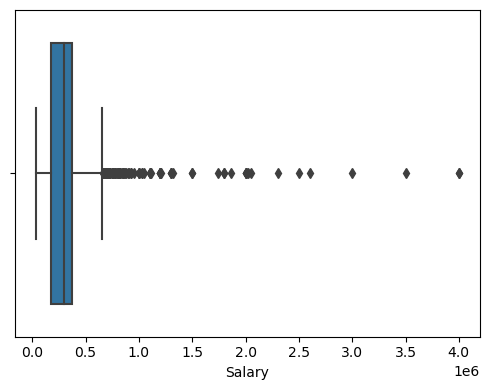

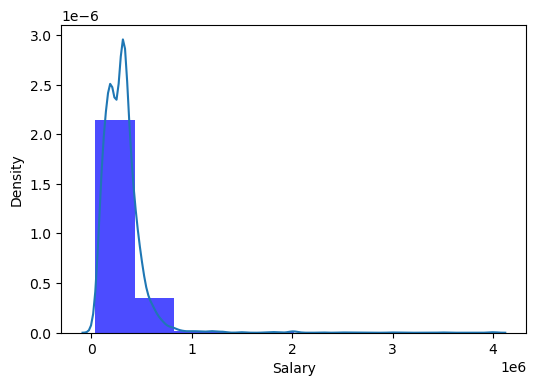

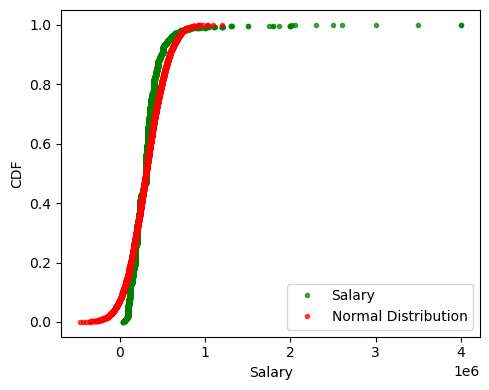

In [72]:
univariate_num("Salary")

**Observation:**
1. Box plot: There are so many data points with high salaries.
2. Histogram: seems like data is positively skewed.
3. CDF: It reveals a high degrees of skewness in the data.

The Average of 10percentage: 79.15
The Maximum of 10percentage: 97.76
The Minimum of 10percentage: 43.0
============================== 10percentage ==============================


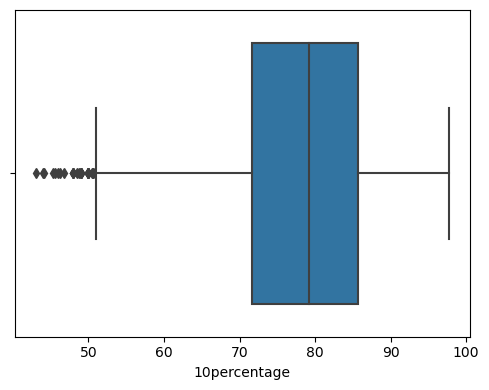

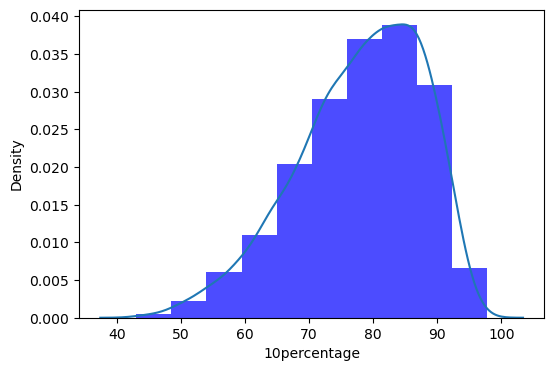

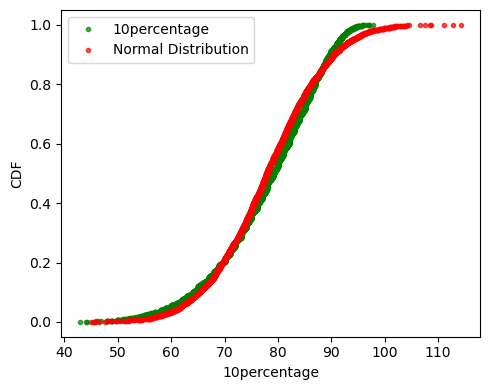

In [73]:
univariate_num('10percentage')

### Observation
1. Box plot: There are some outliers evident from the plot.
2. Histogram: The data is negatively skewed
3. CDF:The data exhibits some skewness and does not conform to a normal distribution pattern.

The Average of 12percentage: 74.4
The Maximum of 12percentage: 98.7
The Minimum of 12percentage: 40.0
============================== 12percentage ==============================


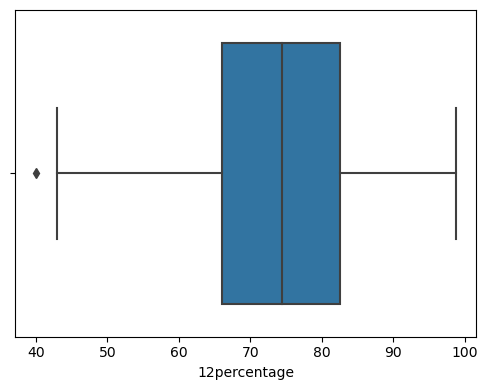

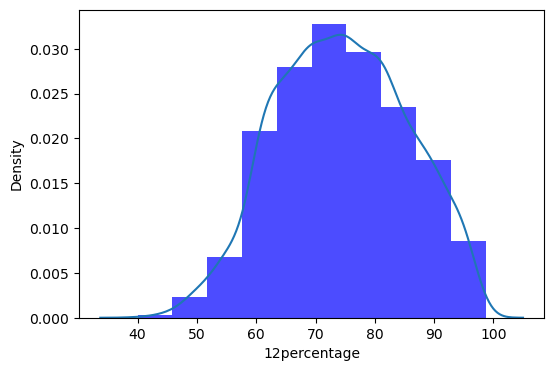

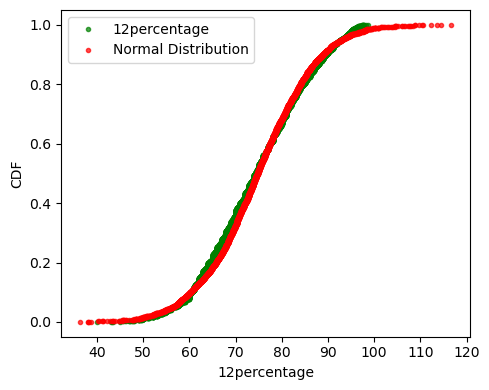

In [74]:
univariate_num('12percentage')

### Observation
1. Box plot: There is only one data point has extreme low score.
2. Histogram: Majority of scoring is between 65-85, peak is at 70.
3. CDF:The data does not follow Normal Distribution

The Average of collegeGPA: 71.8
The Maximum of collegeGPA: 99.93
The Minimum of collegeGPA: 49.07
============================== collegeGPA ==============================


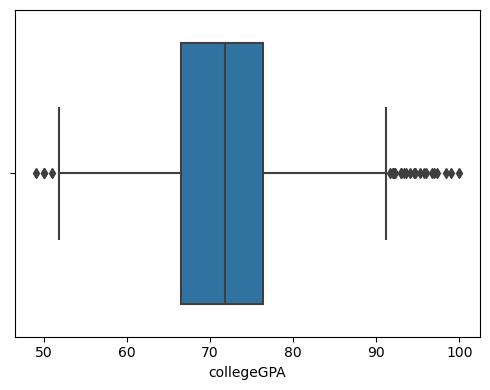

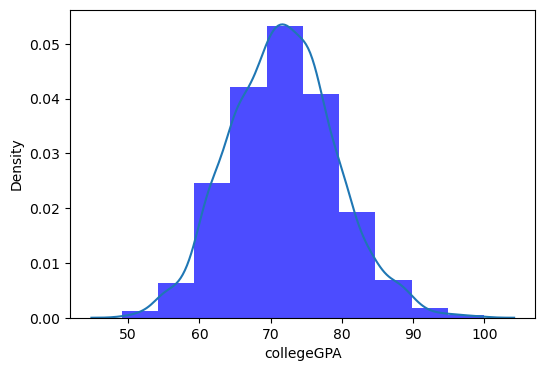

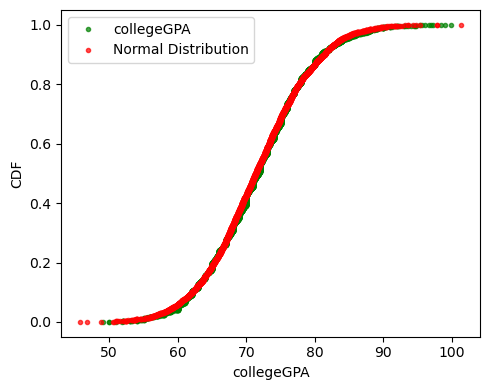

In [75]:
univariate_num('collegeGPA')

### Observation
1. Box plot: we can see that outliers with in the dataset.
2. Histogram:Majority of scoring is between 65-75, peak is at 70.
3. CDF:The data exhibits some skewness and does not conform to a normal distribution pattern.

The Average of English: 500.0
The Maximum of English: 875
The Minimum of English: 180
============================== English ==============================


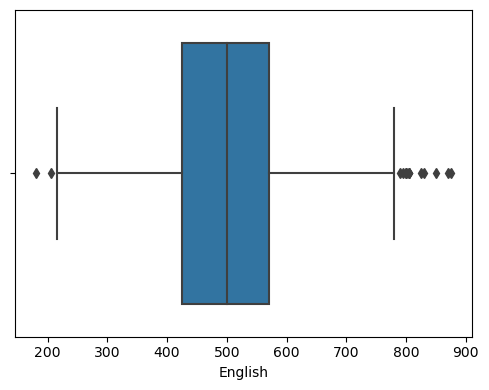

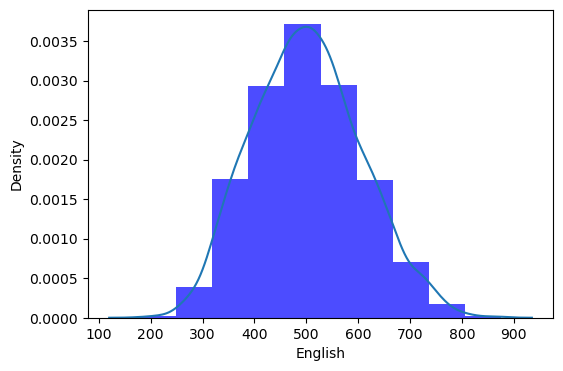

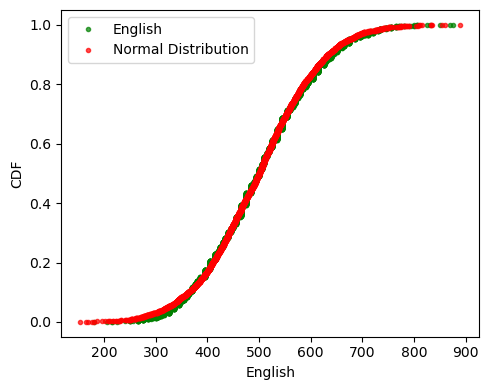

In [76]:
univariate_num('English')

### Observation
1. Box plot: Both lower and higher extreme values are evident from the distribution representation.
2. Histogram:Majority of the scores fell within the range of 389 to 545.
3. CDF:seems like data follows normal distribution

The Average of Logical: 505.0
The Maximum of Logical: 795
The Minimum of Logical: 195
============================== Logical ==============================


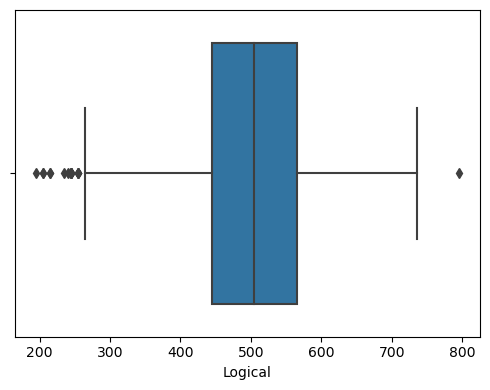

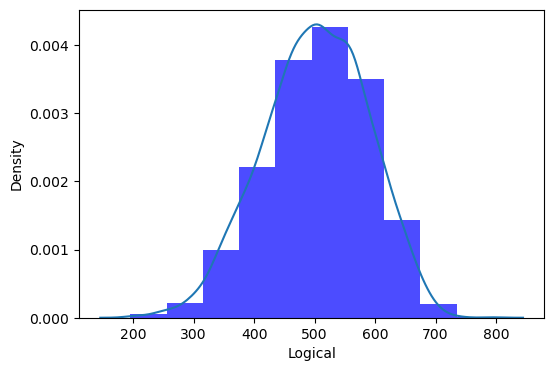

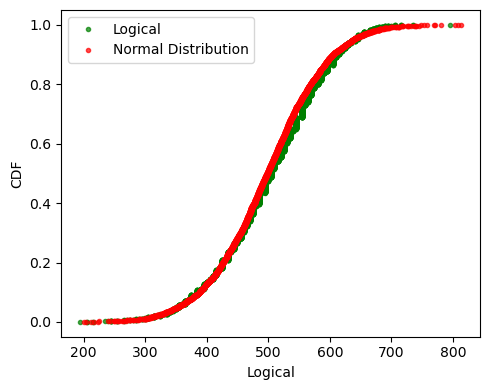

In [77]:
univariate_num('Logical')

### Observation
1. Box plot: Data has few lower extreme values and one higher extreme value.
2. Histogram:Most scores fell within the range of 454 to 584, peaking at 495, with an average of 502.
3. CDF:seems like data approximately follows normal distribution.

The Average of Quant: 515.0
The Maximum of Quant: 900
The Minimum of Quant: 120
============================== Quant ==============================


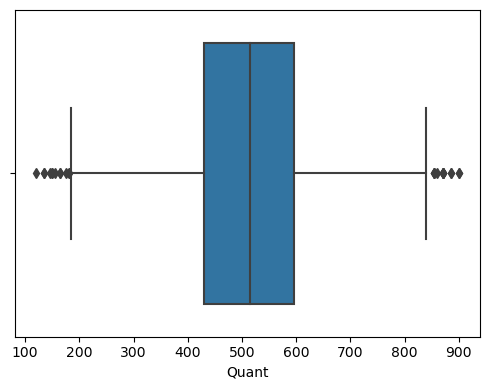

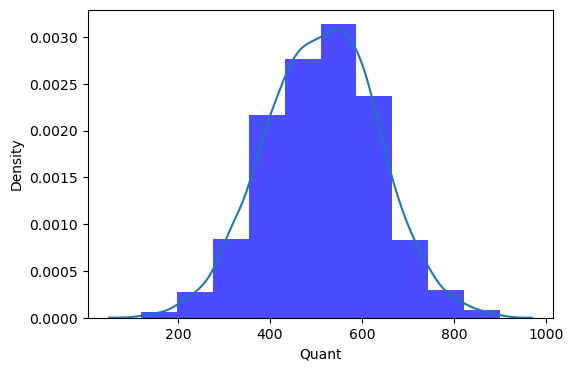

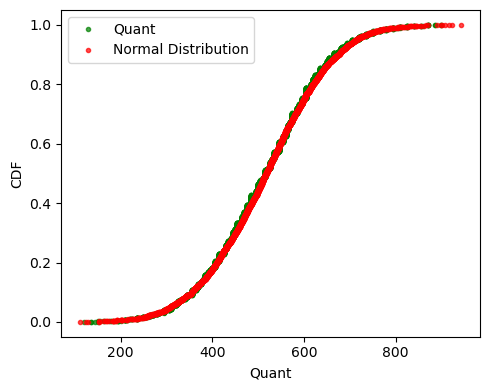

In [78]:
univariate_num('Quant')

### Observation
1. Box plot: Data has few both lower and higher extreme value.
2. Histogram:Majority of the scores were in between 425-608. The maximum number of students scored 605 with an average of 513.
3. CDF:seems like data slightly follows normal distribution.

The Average of ComputerProgramming: 415.0
The Maximum of ComputerProgramming: 840.0
The Minimum of ComputerProgramming: 105.0
============================== ComputerProgramming ==============================


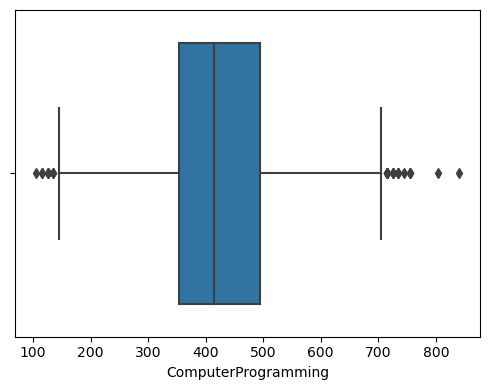

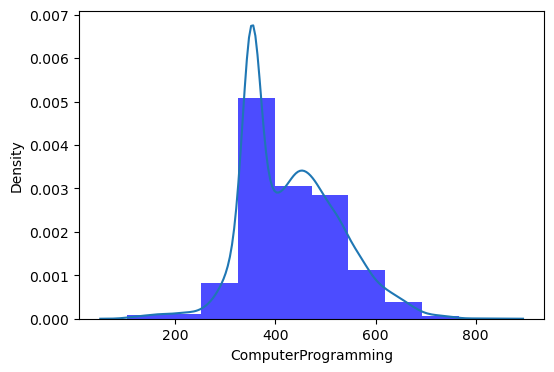

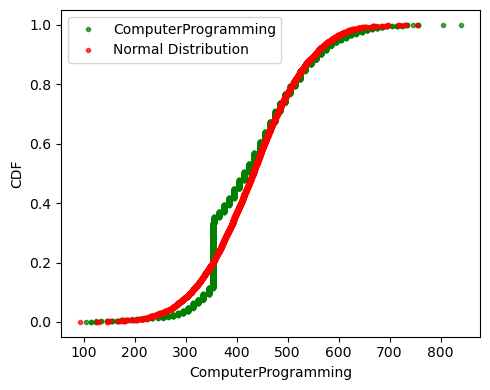

In [79]:
df1['ComputerProgramming']=df1['ComputerProgramming'].replace({-1:df1.ComputerProgramming.mean()})
univariate_num('ComputerProgramming')

### Observation
1. Box plot: The box plot illustrates the presence of numerous low extreme values aswell as high extreme values.
2. Histogram:The majority of scores ranged between 416 and 459. The peak occurred at 455, with an average score of 452
3. CDF:seems like data does not follows normal distribution.

The Average of ElectronicsAndSemicon: 95.32841420710355
The Maximum of ElectronicsAndSemicon: 612.0
The Minimum of ElectronicsAndSemicon: 95.32841420710355
============================== ElectronicsAndSemicon ==============================


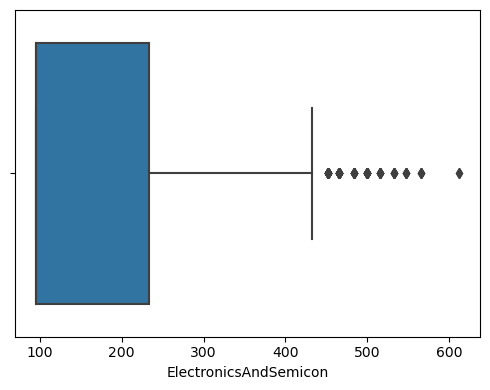

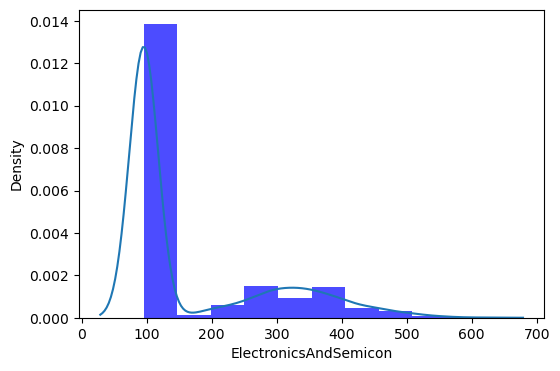

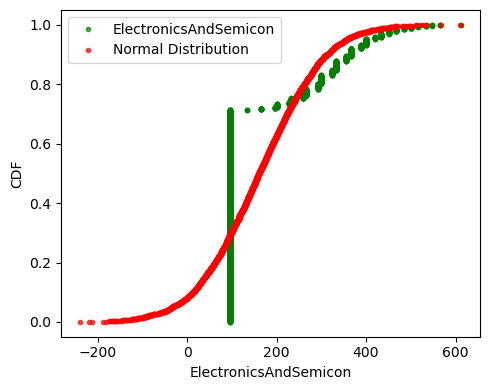

In [80]:
df1['ElectronicsAndSemicon']=df1['ElectronicsAndSemicon'].replace({-1:df1.ElectronicsAndSemicon.mean()})
univariate_num('ElectronicsAndSemicon')

### Observation
1. Box plot: The lowest score is equal to the median of the dataset.
2. Histogram:Most scores fell between 0 and 79. The highest number of students scored 0, with an average score of 96.
3. CDF:seems like data does not follows normal distribution.

The Average of grad_age: 22.0
The Maximum of grad_age: 34
The Minimum of grad_age: 17
============================== grad_age ==============================


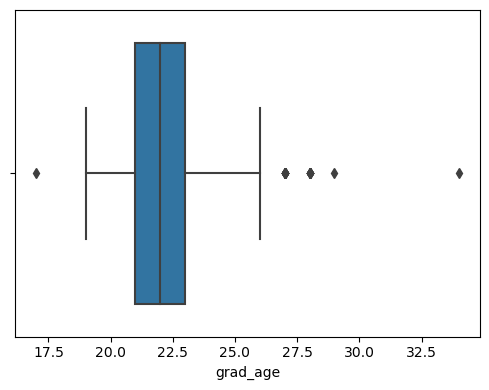

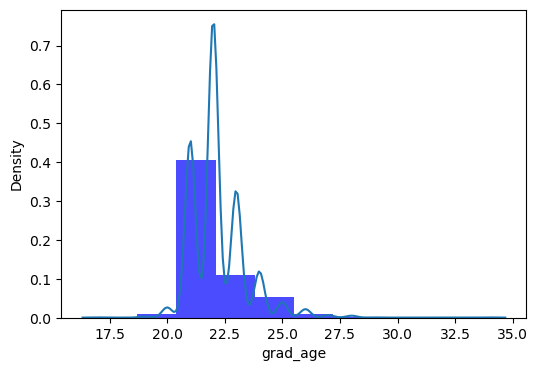

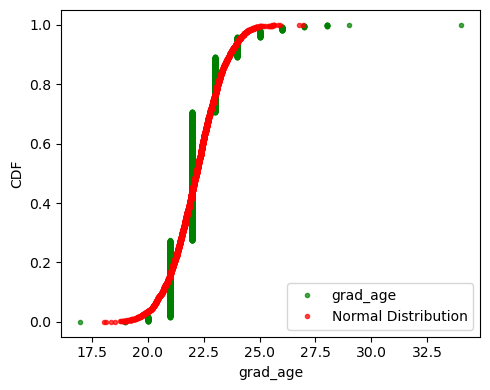

In [81]:
univariate_num('grad_age')

### Observation
1. Box plot: we can see the presence of 4 students with very high ages and one with a very low age compared to other data points.
2. Histogram:The majority of students’ ages ranged between 22 and 25.
3. CDF:seems like data does not follows normal distribution.

The Average of tenure: 3.0
The Maximum of tenure: 33
The Minimum of tenure: 0
============================== tenure ==============================


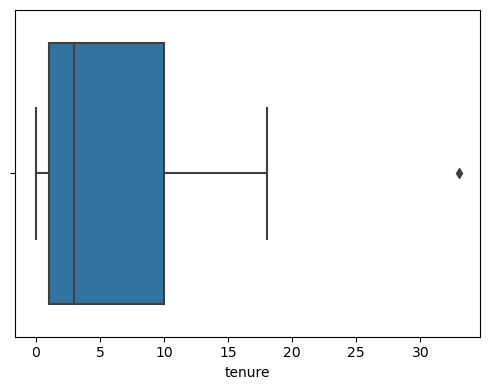

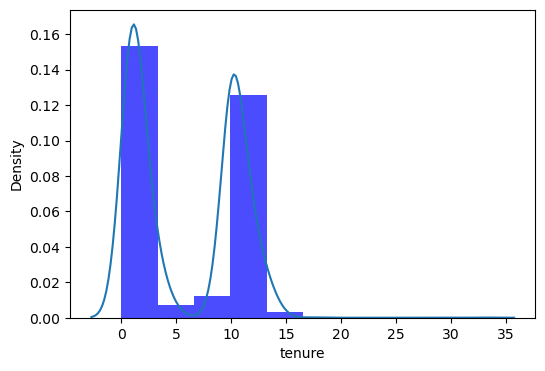

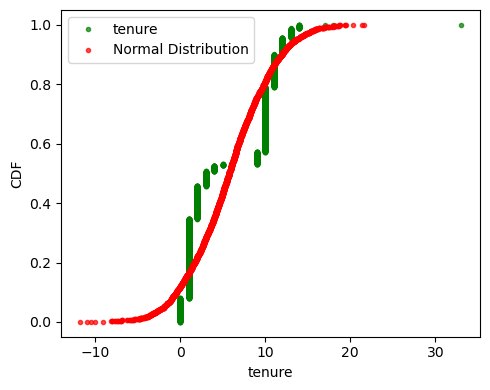

In [82]:
univariate_num('tenure')

### Observation
1. Box plot:only one data point has higher tenurity.
2. Histogram:we can see average tenurity of data at 3 years and 
3. CDF:seems like data does not follows normal distribution.

## Categorical

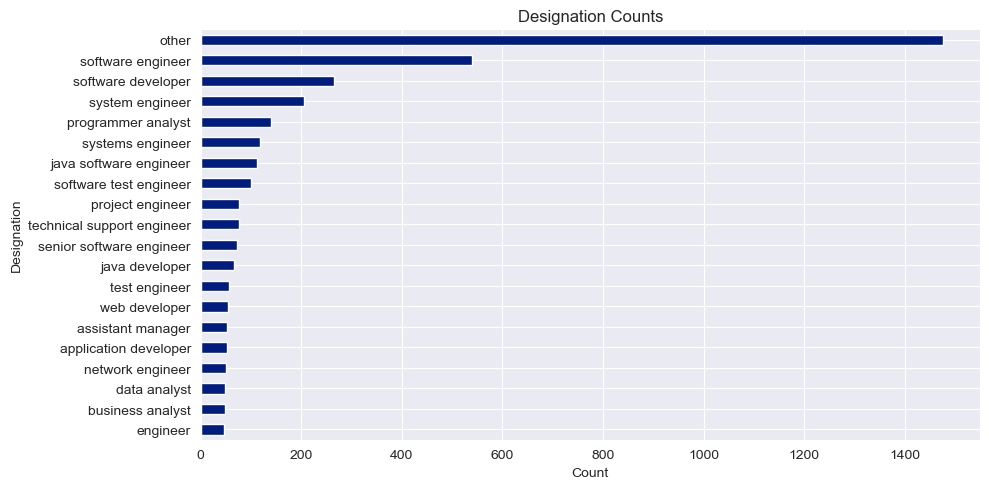

In [116]:
df1['Designation'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh',title='Designation Counts',
                                                                        figsize=(10, 5))

plt.ylabel('Designation')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

**Observation:**Software engineer is the most common desgination of all, followed by system
engineer and software developer.

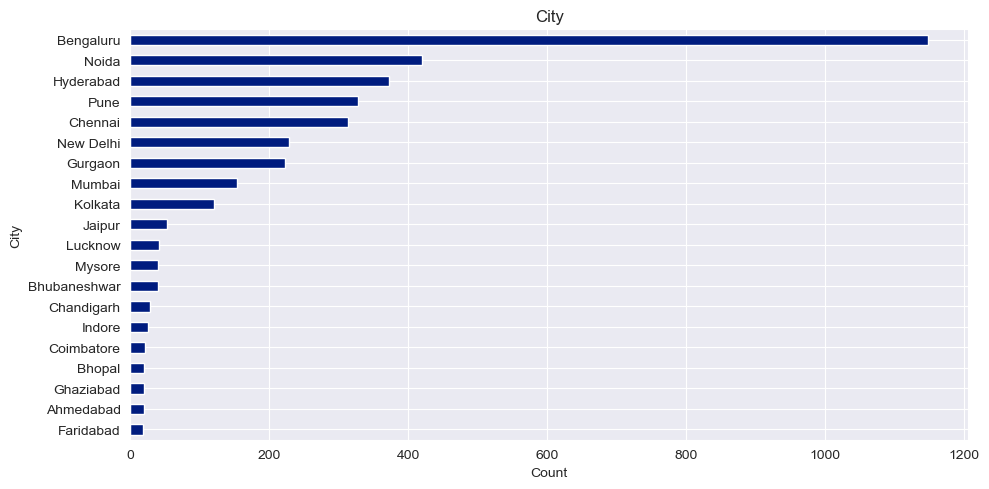

In [115]:
df1['JobCity'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh',title='City',
                                                                        figsize=(10, 5))

plt.ylabel('City')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

**Observations:** The most favourable city for job placements is bangalore, followed by Noida, Hyderabad and pune. Mumbai and kolkata being least favourable.

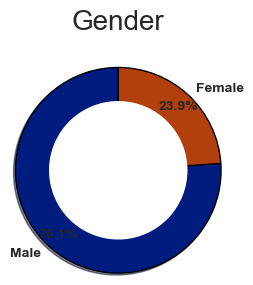

In [117]:
plt.figure(figsize=(3,3))
plt.pie(df1['Gender'].value_counts().tolist(),
labels=df1['Gender'].value_counts().index,
autopct='%1.1f%%',
radius=1.5,
wedgeprops={'edgecolor': 'k'},
textprops={'fontsize': 10, 'fontweight': 'bold'},
shadow=True,
startangle=90,
pctdistance=0.85)
plt.pie(df1['Gender'].value_counts().tolist(),
colors=['white'],
wedgeprops={'edgecolor': 'white'},
radius=1)
plt.title('Gender', pad=40, size=20)
plt.tight_layout()
plt.show()

**Observation:**The dataset is not balanced in terms of gender.

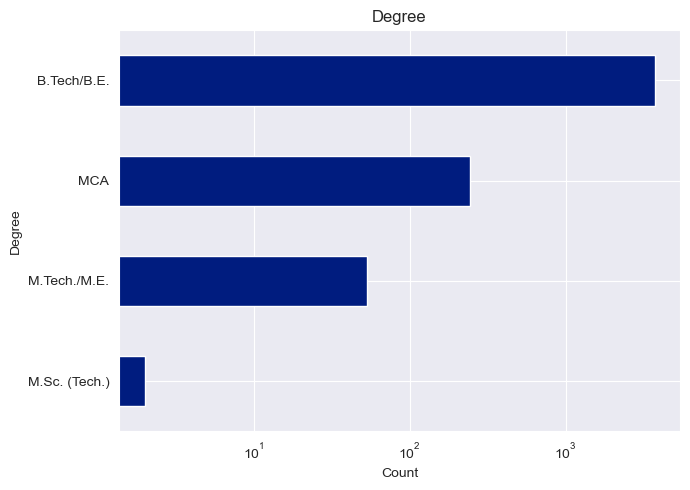

In [118]:
df1['Degree'].value_counts().sort_values(ascending=True).plot(kind='barh',title='Degree',figsize=(7, 5))
plt.ylabel('Degree')
plt.xlabel('Count')
plt.xscale('log')
plt.tight_layout()
plt.show()


**Observations;** Most of the students have done their graduation in B.Tech and there are very less
students from M.Sc(Tech)


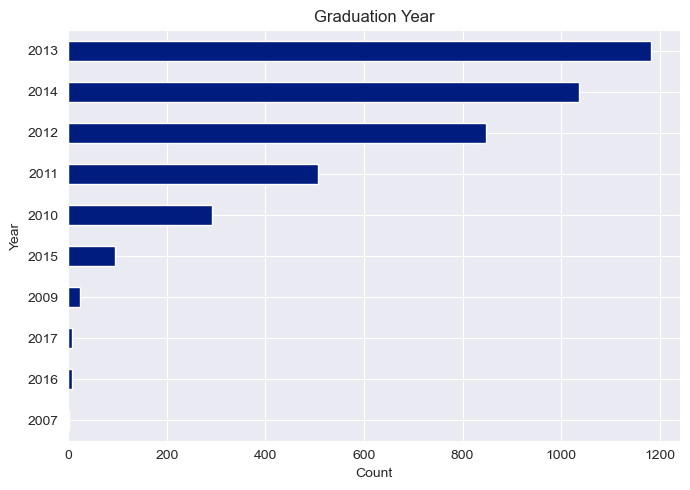

In [119]:
df1['GraduationYear'].value_counts().sort_values(ascending=True).plot(kind='barh',title='Graduation Year',figsize=(7, 5))
plt.ylabel('Year')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


**Observation:** Maximum number of students were graduated in 2013, followed by the year 2014
and 2012.

## Bivariate Analysis

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5]),
 [Text(0, 0.5, 'Salary'),
  Text(0, 1.5, 'DOB'),
  Text(0, 2.5, '10percentage'),
  Text(0, 3.5, '12graduation'),
  Text(0, 4.5, '12percentage'),
  Text(0, 5.5, 'collegeGPA'),
  Text(0, 6.5, 'CollegeCityTier'),
  Text(0, 7.5, 'GraduationYear'),
  Text(0, 8.5, 'English'),
  Text(0, 9.5, 'Logical'),
  Text(0, 10.5, 'Quant'),
  Text(0, 11.5, 'Domain'),
  Text(0, 12.5, 'ComputerProgramming'),
  Text(0, 13.5, 'ElectronicsAndSemicon'),
  Text(0, 14.5, 'conscientiousness'),
  Text(0, 15.5, 'agreeableness'),
  Text(0, 16.5, 'extraversion'),
  Text(0, 17.5, 'nueroticism'),
  Text(0, 18.5, 'openess_to_experience'),
  Text(0, 19.5, 'grad_age'),
  Text(0, 20.5, 'tenure'),
  Text(0, 21.5, 'AverageScore'),
  Text(0, 22.5, 'Acadperf')])

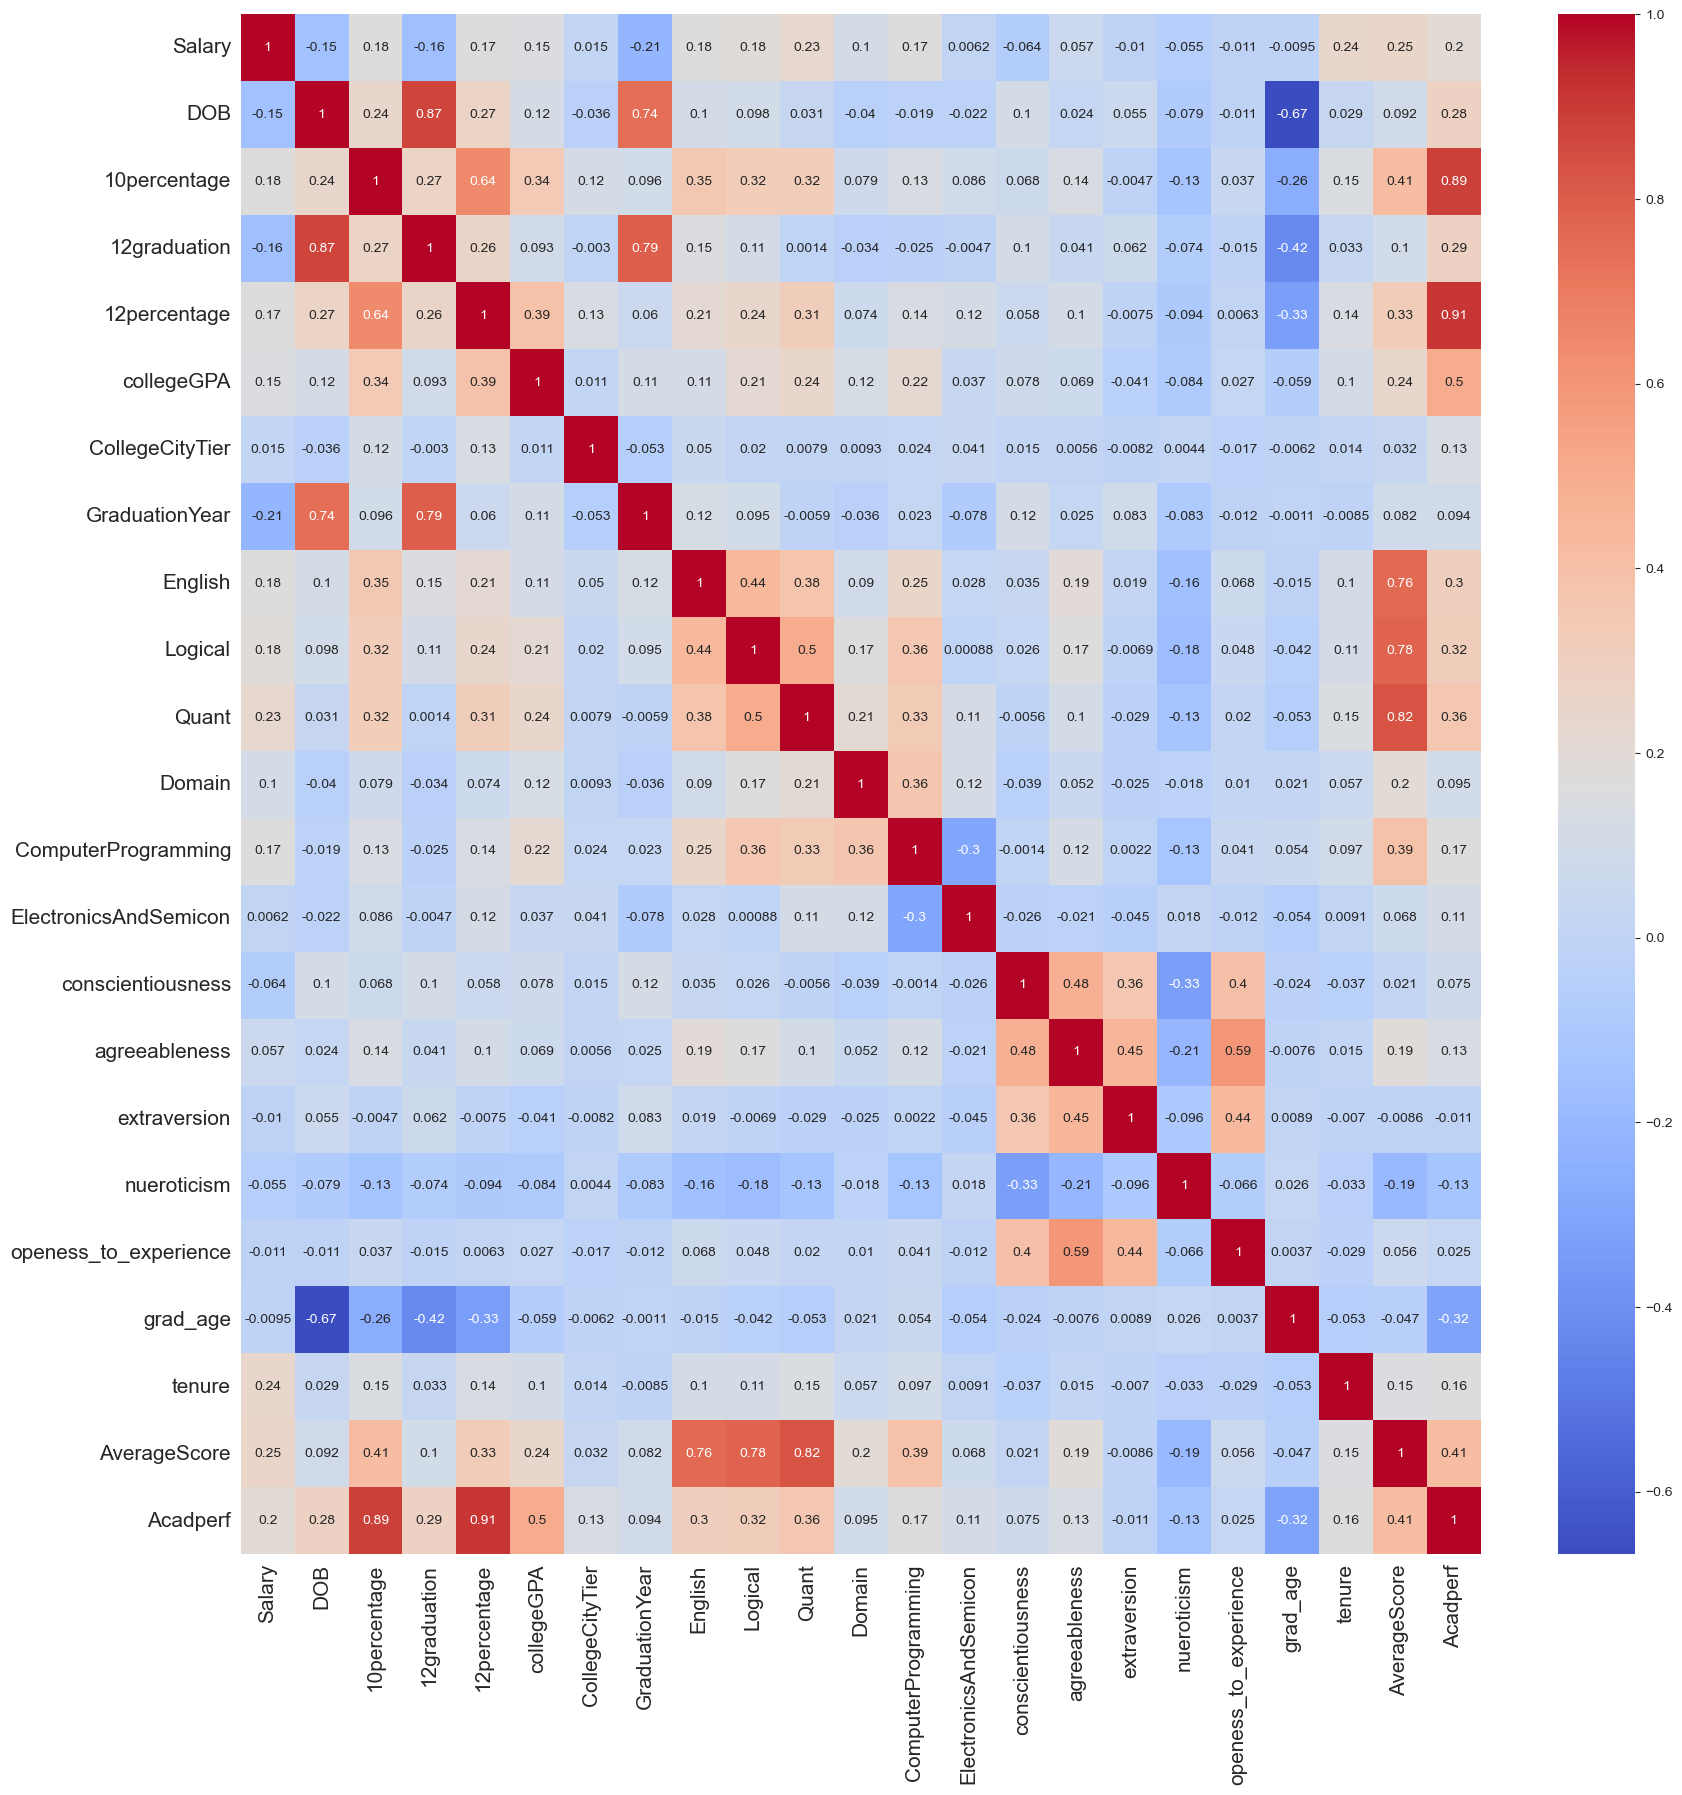

In [114]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

<Figure size 1500x500 with 0 Axes>

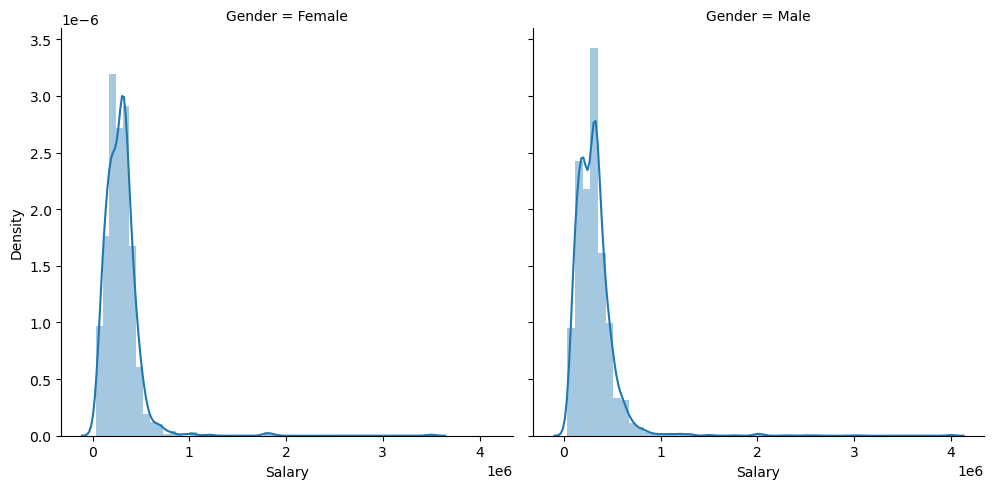

In [88]:
plt.figure(figsize=(15,5))
colors = sns.color_palette('bright',n_colors=2)
sns.FacetGrid(df1, col="Gender", size=5,palette=colors) \
   .map(sns.distplot, "Salary",bins=50) \
   .add_legend()
plt.show()

1. We can observe that the salary data is right skewed.
2. We can also see that the distributions are quite similar for male and female in the range below 10lakhs.

Text(0.5, 0.98, 'Salary levels by specialization')

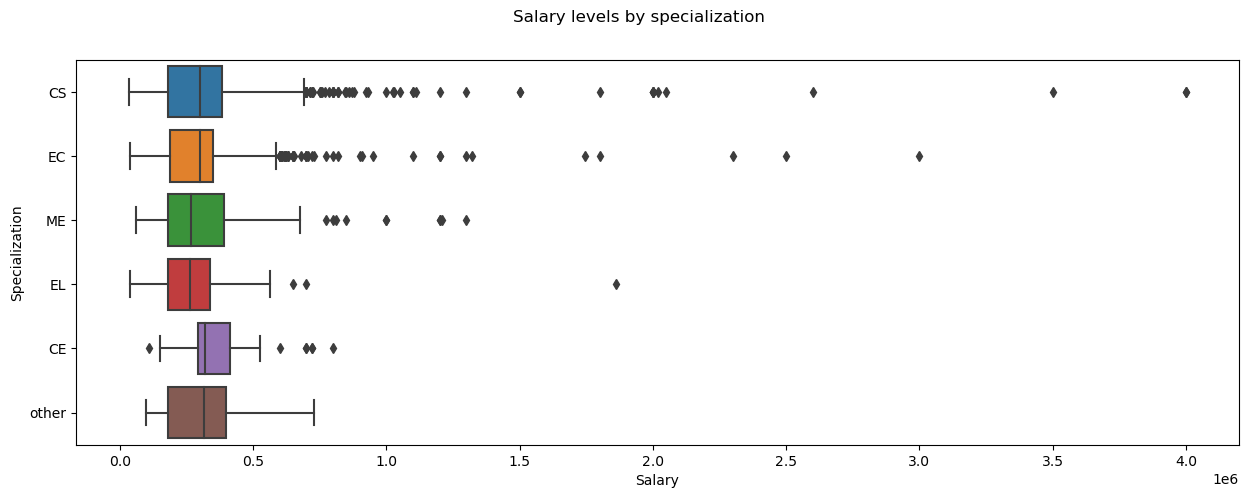

In [89]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Salary',y='Specialization',data=df1)
plt.suptitle('Salary levels by specialization')

1. Median salary of people from all specializations are nearly similar.
2. We can see there are more people getting higher pays who have specialization in CS/EC compared to others.

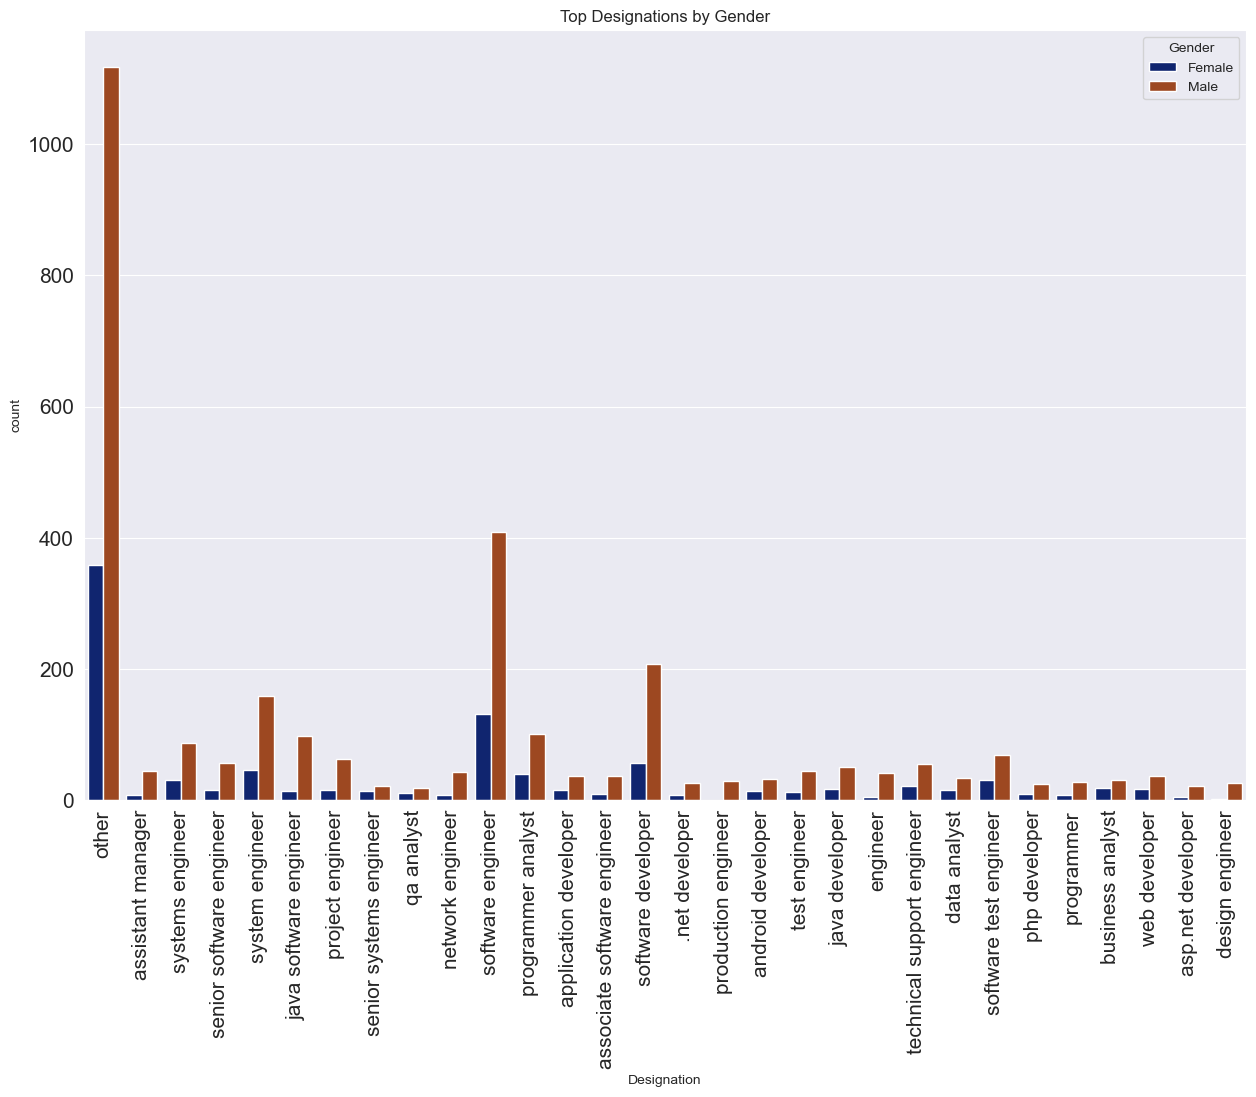

In [90]:
plt.figure(figsize=(15,10))
sns.set_palette("dark")
sns.set_style("darkgrid")
sns.countplot(x='Designation',hue='Gender',data=df1)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top Designations by Gender")
plt.show()

**Observation:**
1. Among these top Designations the most data points are in **Software Engineering**.
2. In all designations male category dominates female.

In [91]:
salary_pay=list(df1.sort_values("Salary",ascending=False)['Designation'].unique())[:20]
huge_pay=df1[df1['Designation'].isin(salary_pay)]
huge_pay.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,12graduation,12percentage,...,Domain,ComputerProgramming,ElectronicsAndSemicon,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,grad_age,tenure
0,420000.0,2012-06-01,2024-02-23 02:30:36.133894,other,Bengaluru,Female,1990,84.3,2007,95.8,...,0.635979,445.000000,95.328414,0.9737,0.8128,0.5269,1.35490,-0.4455,21,12
1,500000.0,2013-09-01,2024-02-23 02:30:36.133894,assistant manager,Indore,Male,1989,85.4,2007,85.0,...,0.960603,353.102801,466.000000,-0.7335,0.3789,1.2396,-0.10760,0.8637,23,11
2,325000.0,2014-06-01,2024-02-23 02:30:36.133894,systems engineer,Chennai,Female,1992,85.0,2010,68.2,...,0.450877,395.000000,95.328414,0.2718,1.7109,0.1637,-0.86820,0.6721,22,10
3,1100000.0,2011-07-01,2024-02-23 02:30:36.133894,senior software engineer,Gurgaon,Male,1989,85.6,2007,83.6,...,0.974396,615.000000,95.328414,0.0464,0.3448,-0.3440,-0.40780,-0.9194,22,13
4,200000.0,2014-03-01,2015-03-01 00:00:00.000000,other,Manesar,Male,1991,78.0,2008,76.8,...,0.124502,353.102801,233.000000,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,21,1


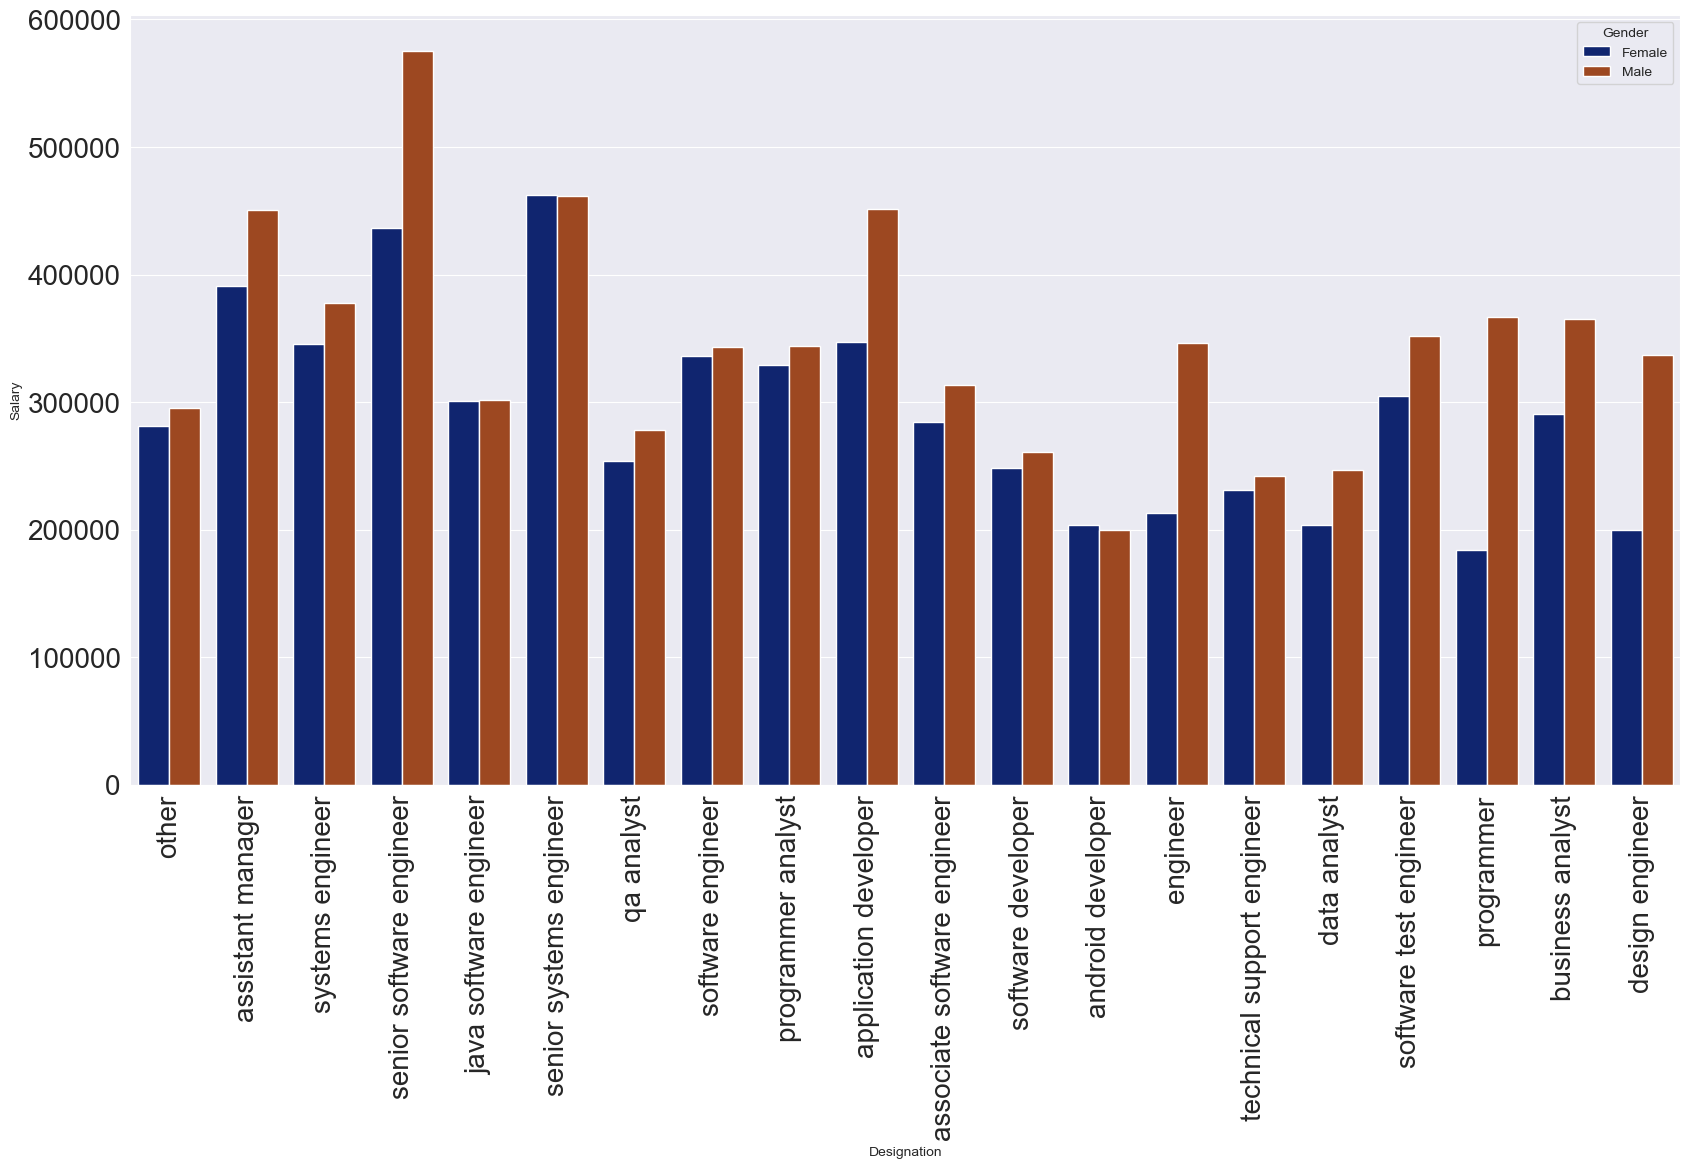

In [92]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=huge_pay,ci=None)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.show()

### Observation
1. In all domains men category dominates the women category
2. Senior software engineer has highest paying and least paid in web developer in male category.
3. For Test Engineer role female Category pay higher the male.
4. For System Engineer role both categories paid similar.

For Whole dataset
Gender
Female    5.826829
Male      5.774853
Name: tenure, dtype: float64
For High_paying jobs
Gender
Female    5.809822
Male      5.737915
Name: tenure, dtype: float64


<Figure size 2000x500 with 0 Axes>

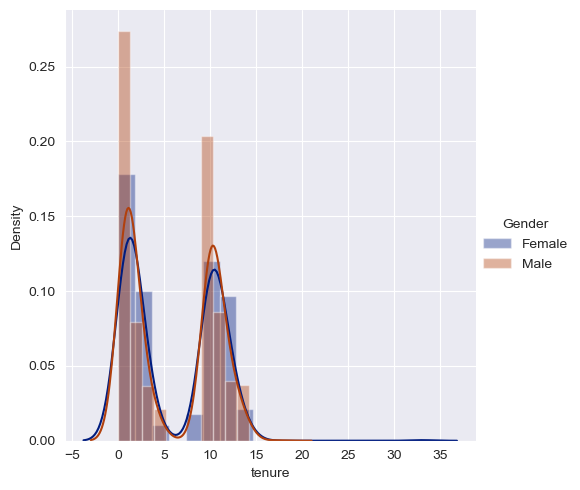

In [93]:
plt.figure(figsize=(20,5))

sns.FacetGrid(huge_pay, hue="Gender",size=5) \
   .map(sns.distplot, "tenure") \
   .add_legend()
print('For Whole dataset')
print(huge_pay.groupby('Gender').tenure.mean())
print('='*30)
print('For High_paying jobs')
print(df1.groupby('Gender').tenure.mean())

### Observation
1. It is a Bi-Modal Distribution.
2. Average Experience of male is around 5years and for women it is around 4 and half years.

<AxesSubplot:xlabel='tenure', ylabel='Salary'>

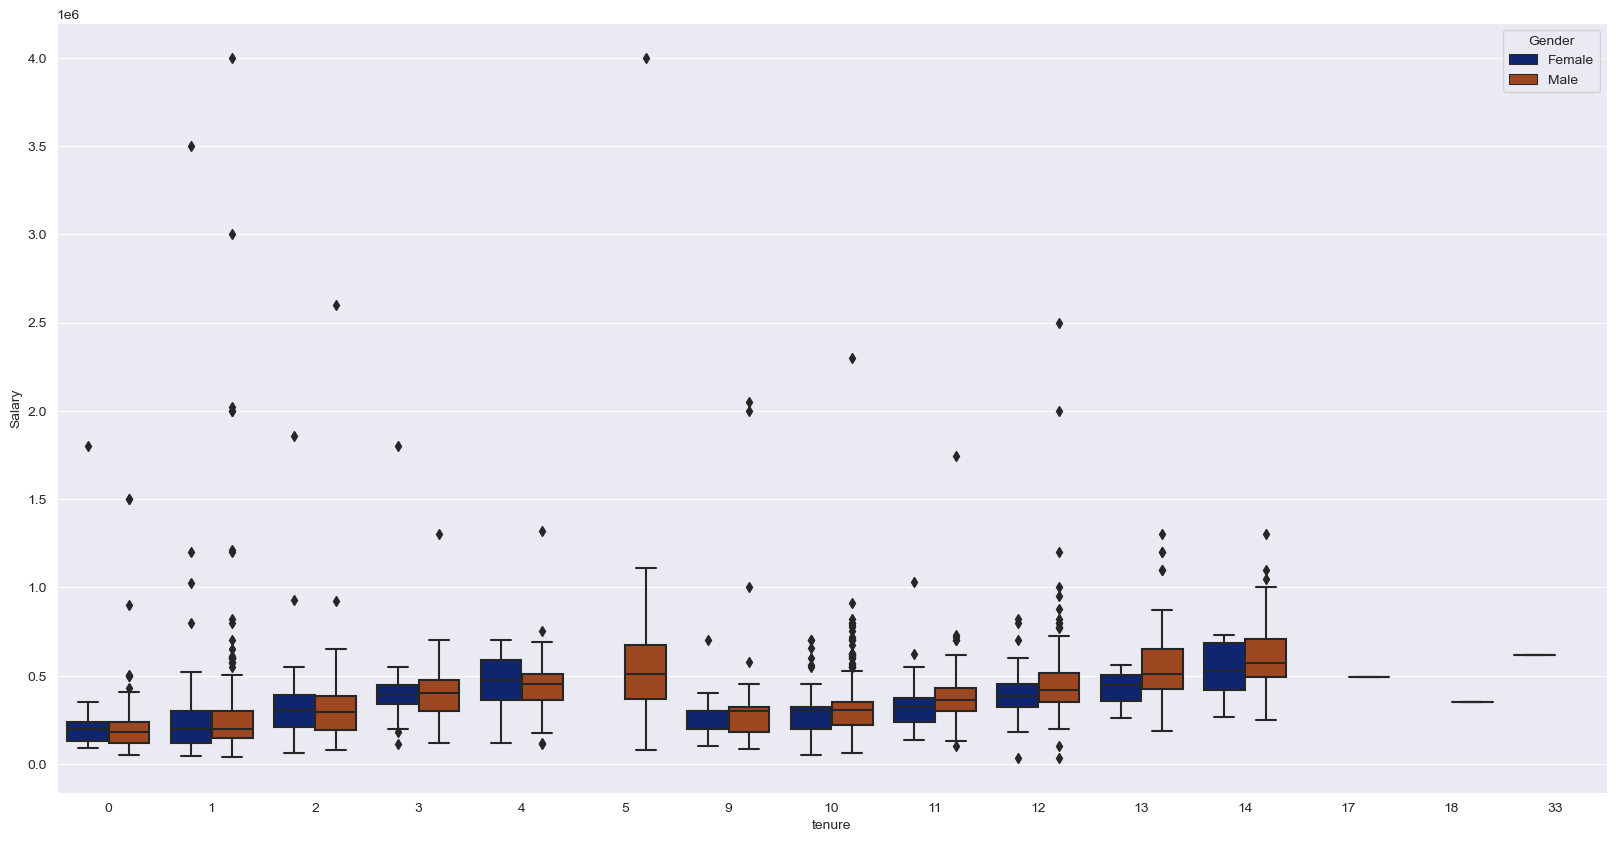

In [94]:
plt.figure(figsize=(20,10))
sns.boxplot(data=huge_pay,x='tenure',y='Salary',hue='Gender')

### Observation
1. Median salary of both males and females have increased slightly with exp for first five years and Decreased suddenly on the 6th year and then same pattern for the following years.
2. We can see that men and women having same experience are paid nearly equally around 3.5-5 lakhs.

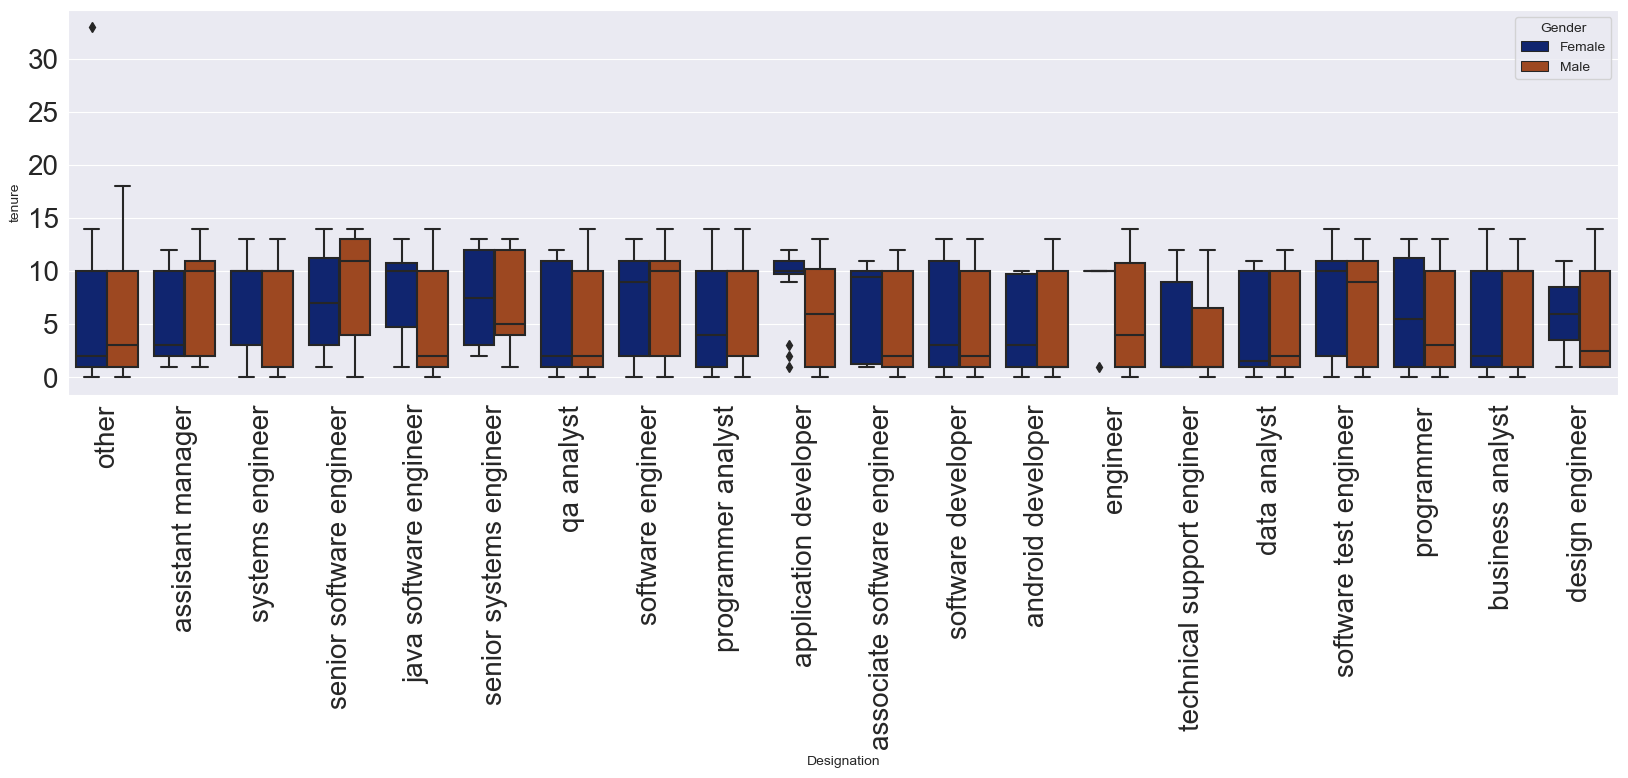

In [95]:
plt.figure(figsize=(20,5))
sns.boxplot(data=huge_pay,x='Designation',y='tenure',hue='Gender')
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.show()

### Observation
1. The tenure distribution for maximum number of Designations is skewed and this tells us every designation have people with both high and low experience
2. We can see there is difference in median experience of male and female in every designation.
3. But it is not a strong evidence to conclude salary difference for women is due to experience because of the fact that in some roles even women having higher experience are paid less and viceversa for men.

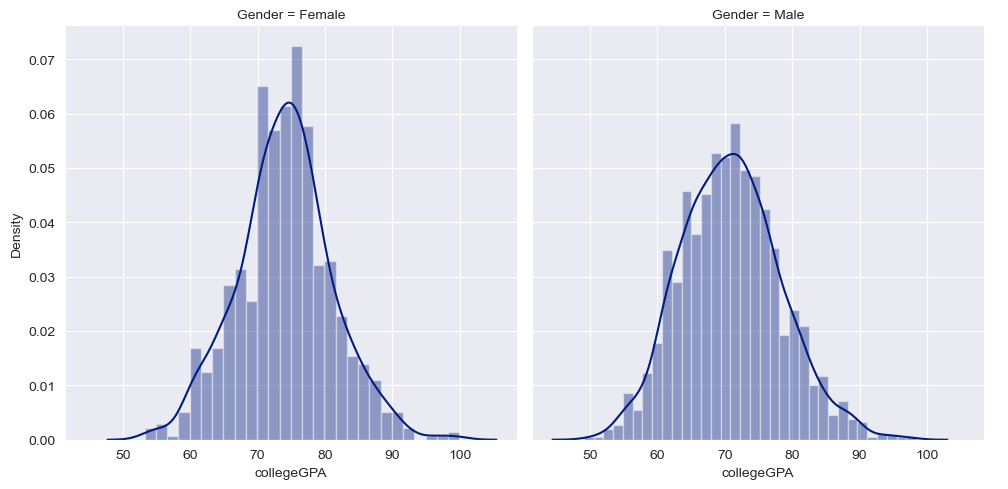

In [96]:
sns.FacetGrid(data=huge_pay,col='Gender',size=5) \
    .map(sns.distplot,'collegeGPA') \
    .add_legend()

### Observation
1. We can see how Similar both male and female distributions are for collegeGPA
2. IQR is narrow indication most number of students have similar cgpa in 70-75% region.
3. There are some students with CGPA < 20 and CGPA>90

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'CS'),
  Text(1, 0, 'EC'),
  Text(2, 0, 'ME'),
  Text(3, 0, 'EL'),
  Text(4, 0, 'CE'),
  Text(5, 0, 'other')])

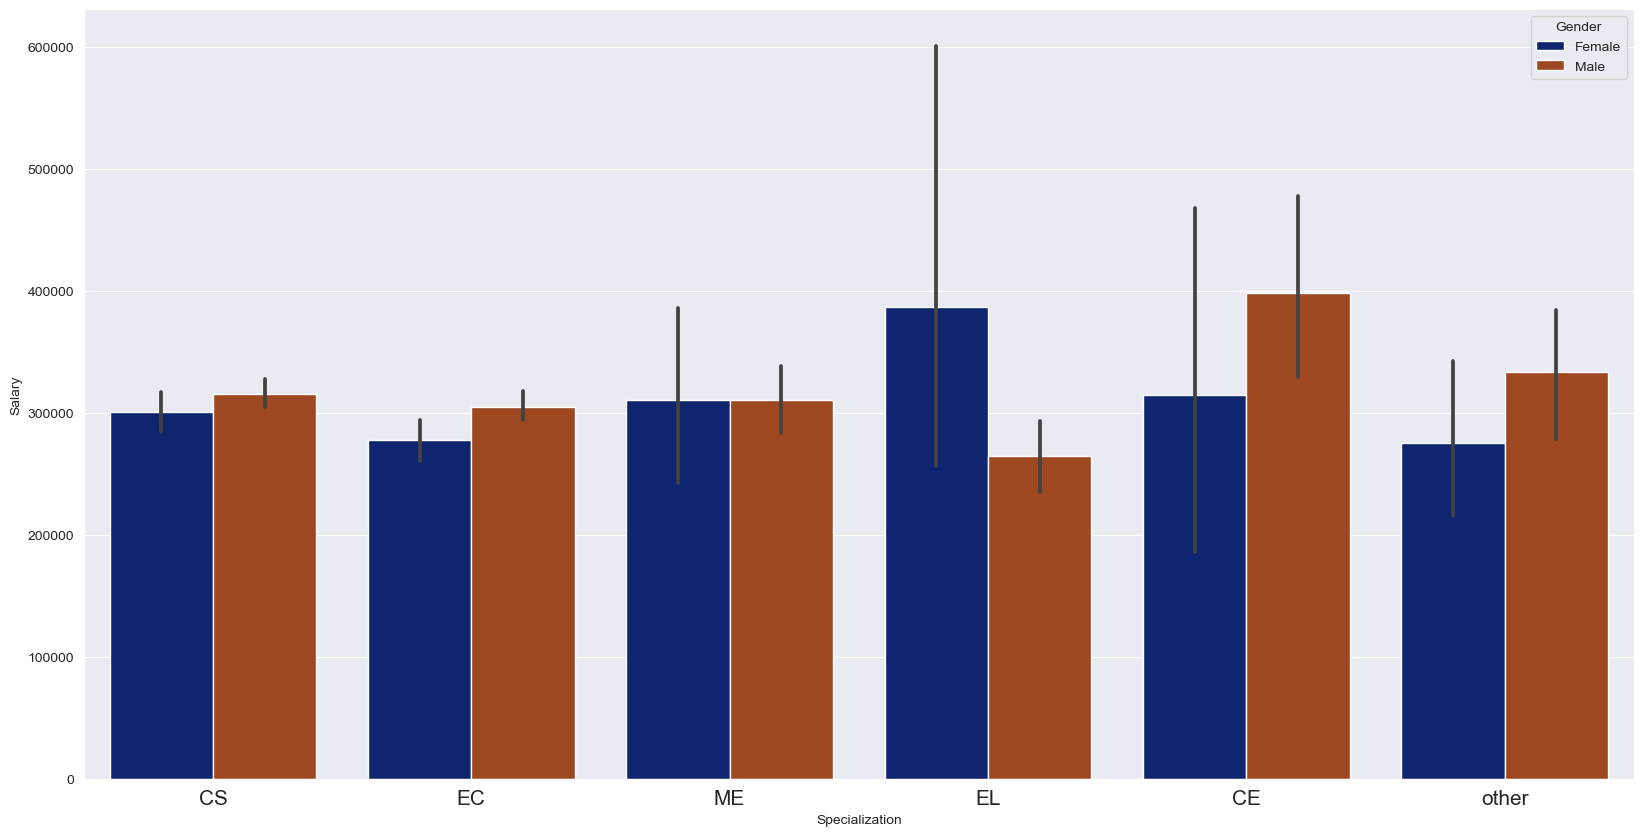

In [97]:
plt.figure(figsize=(20,10))
sns.barplot(data=df1,x='Specialization',y='Salary',hue='Gender')
plt.xticks(fontsize=15)

### Observation
1. Men from CS,EC,CE Earn slightly greater than women from this specialization.
2. Women from the EL specialization Earns way more than men from same specialization.

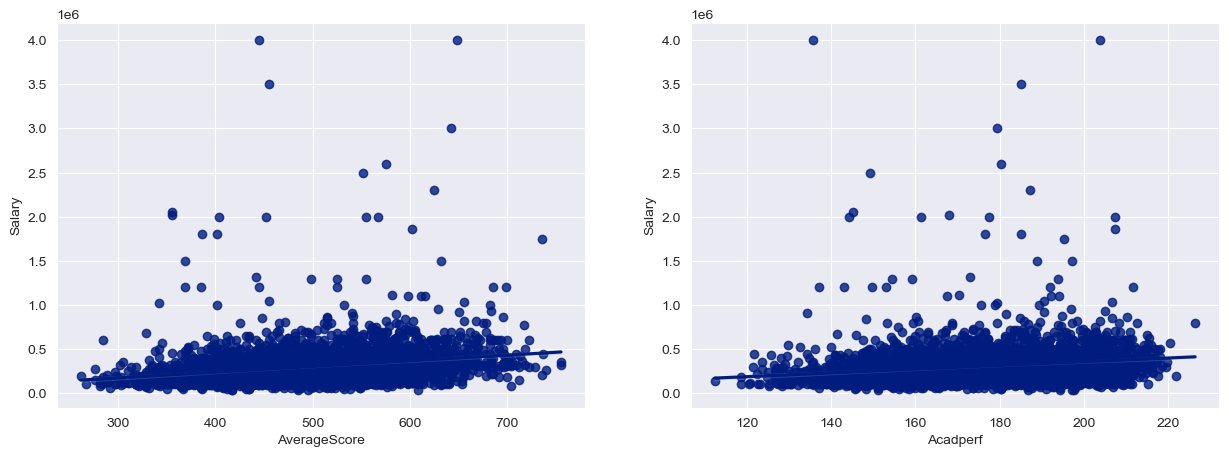

In [98]:
plt.figure(figsize=(15,5))
df1['AverageScore']=(df1['Logical']+df1['Quant']+df1['English'])/3
df1['Acadperf']=df1['10percentage']+df1['12percentage']+df1['collegeGPA']/3
plt.subplot(1,2,1)
sns.regplot(x='AverageScore',y='Salary',data=df1)
plt.subplot(1,2,2)
sns.regplot(x='Acadperf',y='Salary',data=df1)
plt.show()

We can see there is some positive correlation of salary with both the Avgscore and Acadperformance.

# Overall Conclusions:
### 1.Most of Amcat Aspirants are male working in IT domain with an experience of around 5years with degree in Btech and specialization in Computer Science/Information Technology from tier-2 college in uttarpradesh with an average salary around 300k.
### 2.Highpaying jobs taken up by amcat aspirants are mostly from 'IT' Domain.
### 3.Software Engineer and Software Developer are the most aimed profession for amcat aspirants.

# Let us verify some claims

<AxesSubplot:xlabel='Designation', ylabel='Salary'>

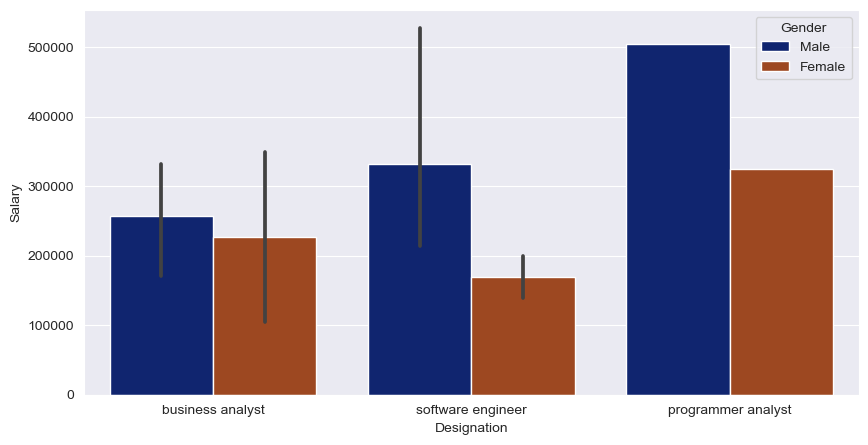

In [105]:
new=df1[(df1["Designation"].isin(["programmer analyst","software engineer","business analyst","associate engineer"])) & (df1["tenure"]==0)]
plt.figure(figsize=(10,5))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=new)

In [106]:
from scipy import stats as st
from scipy.stats import chi2_contingency as cst
pv = st.ttest_1samp(new['Salary'],popmean=250000)[1]
### for a 95% confidence interval,my p- value should be >0.05 to claim the null hypothesis
if pv < 0.05:
    print('We reject the null hypothesis and Average salary is not equal to 250k')
else:
    print('We fail to reject null hypothesis and Avergae salary is equal to 250k')

We fail to reject null hypothesis and Avergae salary is equal to 250k


<AxesSubplot:xlabel='Specialization', ylabel='count'>

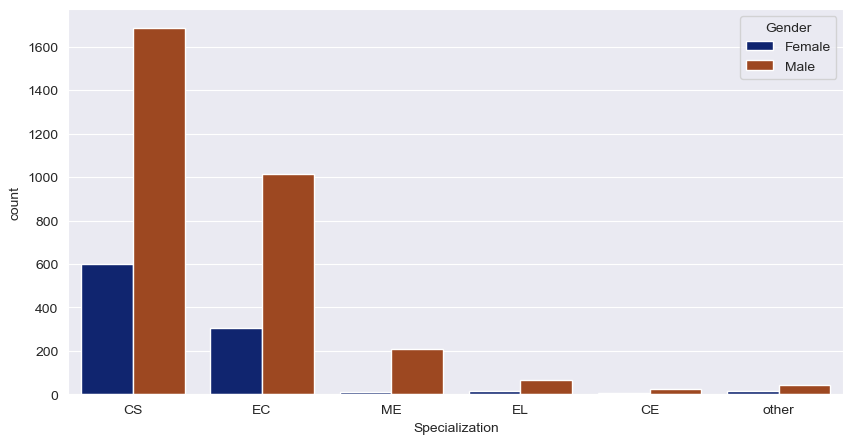

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(data=df1,x='Specialization',hue='Gender')

In [109]:
sample_columns = pd.crosstab(df1['Gender'],df1['Specialization'],margins=True)
pv = cst(sample_columns)[1]
if pv < 0.05:
    print('We reject the null hypothesis and Gender impacts specialization')
else:
    print('We fail to reject null hypothesis and Gender does not impact specialization')

We reject the null hypothesis and Gender impacts specialization


# seems like our claims are true

In [ ]:
df1.to_csv(r"C:\Users\dines\Desktop\Notes\aiml-datascience-notes-python\data\Amcat-cleaned-data.csv")